In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Source of the DS:https://archive.ics.uci.edu/dataset/357/occupancy+detection

In [3]:
# Load the test dataset
df_test = pd.read_csv('datatest2.txt')
# Load the  validation dataset
df_val = pd.read_csv('datatest.txt')
# loading the training data
df_train = pd.read_csv('datatraining.txt')

In [4]:
# so let's check the shape of each DS
print("Train dataset shape:", df_train.shape)
print("Validation dataset shape:", df_val.shape)
print("Test dataset shape:", df_test.shape)

Train dataset shape: (8143, 7)
Validation dataset shape: (2665, 7)
Test dataset shape: (9752, 7)


In [5]:
df_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [6]:
df_val.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [7]:
df_test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [8]:
# The time difference range is 59, 60 and 61 seconds, 24 hours, 
# All these three datasets are almost 2 weeks
# I dont need the day index, because that wont help  a lot with only 2 weeks of data
# So let's handle date column 
df_train['date'] = pd.to_datetime(df_train["date"])
df_train = df_train.sort_values("date").reset_index(drop=True)
df_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [9]:
df_val['date'] = pd.to_datetime(df_val["date"])
df_val = df_val.sort_values("date").reset_index(drop=True)
df_val.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [10]:
df_test['date'] = pd.to_datetime(df_test["date"])
df_test = df_test.sort_values("date").reset_index(drop=True)
df_test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           8143 non-null   datetime64[ns]
 1   Temperature    8143 non-null   float64       
 2   Humidity       8143 non-null   float64       
 3   Light          8143 non-null   float64       
 4   CO2            8143 non-null   float64       
 5   HumidityRatio  8143 non-null   float64       
 6   Occupancy      8143 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 445.4 KB


In [12]:
# I am gonna extract hour and minute:
for df in [df_train, df_val, df_test]:
    df["hour"] = df["date"].dt.hour
    df["minute"] = df["date"].dt.minute
    df['Weekdays'] = df['date'].dt.dayofweek
    df['weekend'] = (df['Weekdays']>= 5).astype(int)

# I am gonna drop date, and weekdays columns, I needed it only to extract weekend
for df in [df_train, df_val, df_test]:
    df.drop(columns=["date", "day_of_week"], inplace=True)
    

KeyError: "['day_of_week'] not found in axis"

In [ ]:
# Some values have many decimal places, so I will round them to 2 but humidity rate will be rounded to 5
df_train = df_train.round({'Temperature': 2, 'Humidity': 5, 'Light': 2, 'CO2': 2, 'HumidityRatio': 5})
df_val = df_val.round({'Temperature': 2, 'Humidity': 5, 'Light': 2, 'CO2': 2, 'HumidityRatio': 5})
df_test = df_test.round({'Temperature': 2, 'Humidity': 5, 'Light': 2, 'CO2': 2, 'HumidityRatio': 5})
df_train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,hour,minute,weekend
0,23.18,27.2720,426.0,721.25,0.00479,1,17,51,0
1,23.15,27.2675,429.5,714.00,0.00478,1,17,51,0
2,23.15,27.2450,426.0,713.50,0.00478,1,17,53,0
3,23.15,27.2000,426.0,708.25,0.00477,1,17,54,0
4,23.10,27.2000,426.0,704.50,0.00476,1,17,55,0


In [ ]:
# let's check for missing values
print(df_train.isnull().sum())
print(df_val.isnull().sum())
print(df_test.isnull().sum())

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
hour             0
minute           0
weekend          0
dtype: int64
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
hour             0
minute           0
weekend          0
dtype: int64
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
hour             0
minute           0
weekend          0
dtype: int64


In [ ]:
# let's check for duplicated values
print(df_train.duplicated().sum())
print(df_val.duplicated().sum())
print(df_test.duplicated().sum())

25
2
27


In [ ]:
# Drop duplicates:
for df in [df_train, df_val, df_test]:
    df.drop_duplicates(inplace=True)

<Axes: xlabel='Occupancy', ylabel='count'>

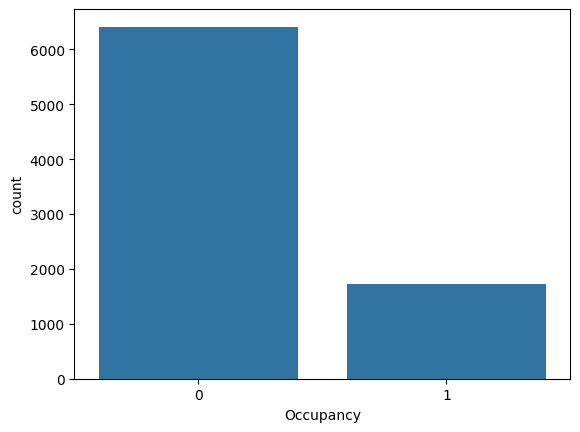

In [ ]:
# let's check balance of the target value
sns.countplot(x='Occupancy', data=df_train)

<Axes: xlabel='Occupancy', ylabel='count'>

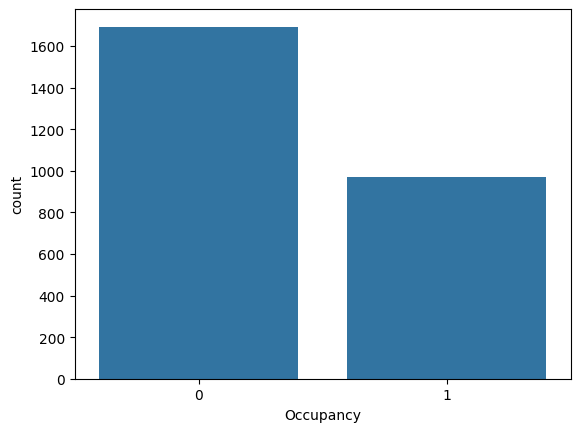

In [ ]:
# let's check balance of the target value
sns.countplot(x='Occupancy', data=df_val)

<Axes: xlabel='Occupancy', ylabel='count'>

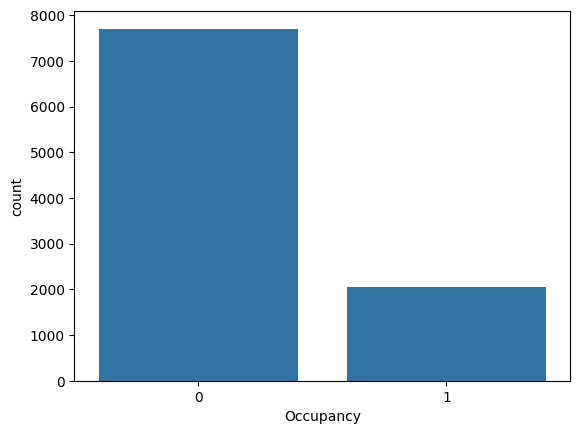

In [ ]:
# let's check balance of the target value
sns.countplot(x='Occupancy', data=df_test)

In [ ]:
# All these three datasets are imbalanced. 

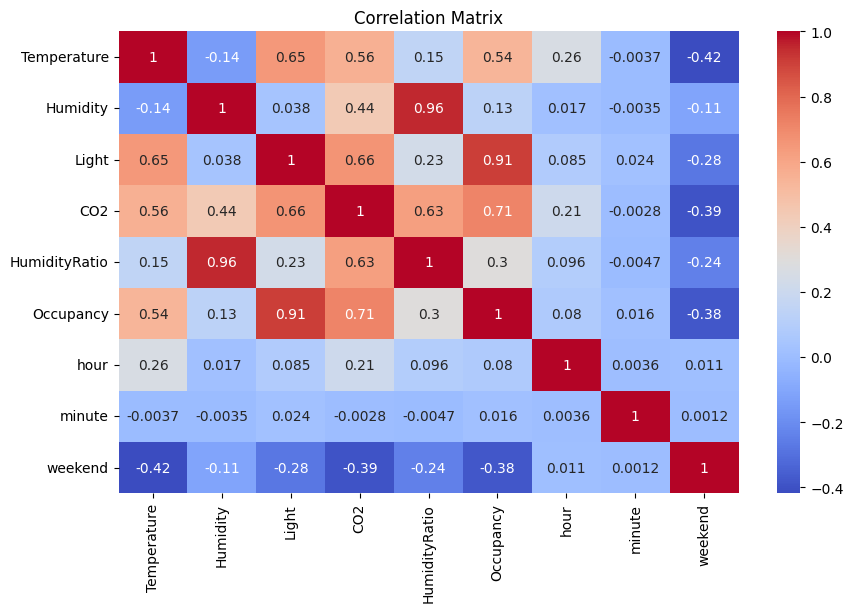

In [ ]:
# let's find the correlation between the features
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Light and CO2 have high correlation with occupancy, that makes sense because when people are in the room.
# HumidityRatio and Humidity are redundant, so I will drop one of them. 

In [ ]:
# Converting hour and minute that CNN will be able to understand their cyclical nature 
for df in [df_train, df_val, df_test]:
    df["hour_sin"]   = np.sin(2 * np.pi * df["hour"] / 24)
    df["hour_cos"]   = np.cos(2 * np.pi * df["hour"] / 24)
    df["minute_sin"] = np.sin(2 * np.pi * df["minute"] / 60)
    df["minute_cos"] = np.cos(2 * np.pi * df["minute"] / 60)

    df.drop(["hour", "minute"], axis=1, inplace=True)

# Source:  https://feature-engine.trainindata.com/en/1.8.x/user_guide/creation/CyclicalFeatures.html

In [ ]:
df_train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,weekend,hour_sin,hour_cos,minute_sin,minute_cos
0,23.18,27.2720,426.0,721.25,0.004793,1,0,-0.965926,-0.258819,-0.809017,0.587785
1,23.15,27.2675,429.5,714.00,0.004783,1,0,-0.965926,-0.258819,-0.809017,0.587785
2,23.15,27.2450,426.0,713.50,0.004779,1,0,-0.965926,-0.258819,-0.669131,0.743145
3,23.15,27.2000,426.0,708.25,0.004772,1,0,-0.965926,-0.258819,-0.587785,0.809017
4,23.10,27.2000,426.0,704.50,0.004757,1,0,-0.965926,-0.258819,-0.500000,0.866025


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    8143 non-null   float64
 1   Humidity       8143 non-null   float64
 2   Light          8143 non-null   float64
 3   CO2            8143 non-null   float64
 4   HumidityRatio  8143 non-null   float64
 5   Occupancy      8143 non-null   int64  
 6   weekend        8143 non-null   int64  
 7   hour_sin       8143 non-null   float64
 8   hour_cos       8143 non-null   float64
 9   minute_sin     8143 non-null   float64
 10  minute_cos     8143 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 699.9 KB


In [ ]:
# I am going to drop Light and HumidityRatio 
for df in [df_train, df_val, df_test]:
        df.drop(['Light', 'HumidityRatio'], axis=1, inplace=True)

In [ ]:
df_train.shape

(8143, 9)

In [ ]:
# Save the cleaned DSs
df_train.to_csv('datatraining.csv', index=False)
df_val.to_csv('datavalidation.csv', index=False)
df_test.to_csv('cleaned_datatest.csv', index=False)